In [ ]:
#importing libraries
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') #available styles: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
import seaborn as sns

In [ ]:
df = pd.read_excel('Monoculture.xlsx') #reading the excel file
df.head() #displaying top 5 rows

,species,Type,predicted,expected,Methods
0,Bacteroides_ovatus_ATCC_8483,Agora,1.448208,0.433217,COMET
1,Bacteroides_ovatus_ATCC_8483,Agora,3.255480,0.433217,Micom
2,Bacteroides_ovatus_ATCC_8483,Agora,3.255480,0.433217,MMT
3,Bacteroides_thetaiotaomicron_VPI_5482,Agora,1.731877,0.636483,COMET
4,Bacteroides_thetaiotaomicron_VPI_5482,Agora,4.651252,0.636483,Micom


In [ ]:
df.columns#displaying names of all columns

Index(['species', 'Type', 'predicted', 'expected', 'Methods'], dtype='object')

In [ ]:
df.shape#size

(42, 5)

In [ ]:
df.isnull().sum()#checking if null values exist

species      0
Type         0
predicted    0
expected     3
Methods      0
dtype: int64

In [ ]:
df.drop((['Type','Methods']),axis=1,inplace=True)#dropping columns that are not required

In [ ]:
df.insert(loc=3, column='diff', value=(df['expected'] - df['predicted'])) #feature engineering, creating an additional column
df

,species,predicted,expected,diff
0,Bacteroides_ovatus_ATCC_8483,1.448208,0.433217,-1.014991
1,Bacteroides_ovatus_ATCC_8483,3.255480,0.433217,-2.822263
2,Bacteroides_ovatus_ATCC_8483,3.255480,0.433217,-2.822263
3,Bacteroides_thetaiotaomicron_VPI_5482,1.731877,0.636483,-1.095394
4,Bacteroides_thetaiotaomicron_VPI_5482,4.651252,0.636483,-4.014769
5,Bacteroides_thetaiotaomicron_VPI_5482,4.651252,0.636483,-4.014769
6,Bacteroides_thetaiotaomicron_VPI_5482,0.816046,0.636483,-0.179563
7,Bacteroides_thetaiotaomicron_VPI_5482,1.098052,0.636483,-0.461569
8,Bacteroides_thetaiotaomicron_VPI_5482,1.098052,0.636483,-0.461569
9,Bacteroides_uniformis_ATCC_8492,1.448208,0.430927,-1.017280


In [ ]:
df.dropna(inplace=True)#dropping null values

In [ ]:
df.shape#size

(39, 4)

In [ ]:
dummies = pd.get_dummies(df, columns=['species'])#assigning true/false values to categorical columns
dummies

,predicted,expected,diff,species_Bacteroides_ovatus_ATCC_8483,species_Bacteroides_thetaiotaomicron_VPI_5482,species_Bacteroides_uniformis_ATCC_8492,species_Bacteroides_vulgatus_ATCC_8482,species_Blautia_hydrogenotrophica_DSM_10507,species_Clostridium_hiranonis_TO_931_DSM_13275,species_Collinsella_aerofaciens_ATCC_25986,species_Desulfovibrio_piger_ATCC_29098,species_Eggerthella_lenta_DSM_2243,species_Faecalibacterium_prausnitzii_A2_165,species_Prevotella_copri_CB7_DSM_18205
0,1.448208,0.433217,-1.014991,True,False,False,False,False,False,False,False,False,False,False
1,3.255480,0.433217,-2.822263,True,False,False,False,False,False,False,False,False,False,False
2,3.255480,0.433217,-2.822263,True,False,False,False,False,False,False,False,False,False,False
3,1.731877,0.636483,-1.095394,False,True,False,False,False,False,False,False,False,False,False
4,4.651252,0.636483,-4.014769,False,True,False,False,False,False,False,False,False,False,False
5,4.651252,0.636483,-4.014769,False,True,False,False,False,False,False,False,False,False,False
6,0.816046,0.636483,-0.179563,False,True,False,False,False,False,False,False,False,False,False
7,1.098052,0.636483,-0.461569,False,True,False,False,False,False,False,False,False,False,False
8,1.098052,0.636483,-0.461569,False,True,False,False,False,False,False,False,False,False,False
9,1.448208,0.430927,-1.017280,False,False,True,False,False,False,False,False,False,False,False


In [ ]:
dummies.columns#names of columns

Index(['predicted', 'expected', 'diff', 'species_Bacteroides_ovatus_ATCC_8483',
       'species_Bacteroides_thetaiotaomicron_VPI_5482',
       'species_Bacteroides_uniformis_ATCC_8492',
       'species_Bacteroides_vulgatus_ATCC_8482',
       'species_Blautia_hydrogenotrophica_DSM_10507',
       'species_Clostridium_hiranonis_TO_931_DSM_13275',
       'species_Collinsella_aerofaciens_ATCC_25986',
       'species_Desulfovibrio_piger_ATCC_29098',
       'species_Eggerthella_lenta_DSM_2243',
       'species_Faecalibacterium_prausnitzii_A2_165',
       'species_Prevotella_copri_CB7_DSM_18205'],
      dtype='object')

In [ ]:
X = dummies[['predicted', 'expected', 'diff']] #choosing values for features
#X = dummies[['predicted', 'diff']]
y = dummies[['species_Bacteroides_ovatus_ATCC_8483', #choosing values for target
       'species_Bacteroides_thetaiotaomicron_VPI_5482',
       'species_Bacteroides_uniformis_ATCC_8492',
       'species_Bacteroides_vulgatus_ATCC_8482',
       'species_Blautia_hydrogenotrophica_DSM_10507',
       'species_Clostridium_hiranonis_TO_931_DSM_13275',
       'species_Collinsella_aerofaciens_ATCC_25986',
       'species_Desulfovibrio_piger_ATCC_29098',
       'species_Eggerthella_lenta_DSM_2243',
       'species_Faecalibacterium_prausnitzii_A2_165',
       'species_Prevotella_copri_CB7_DSM_18205']]

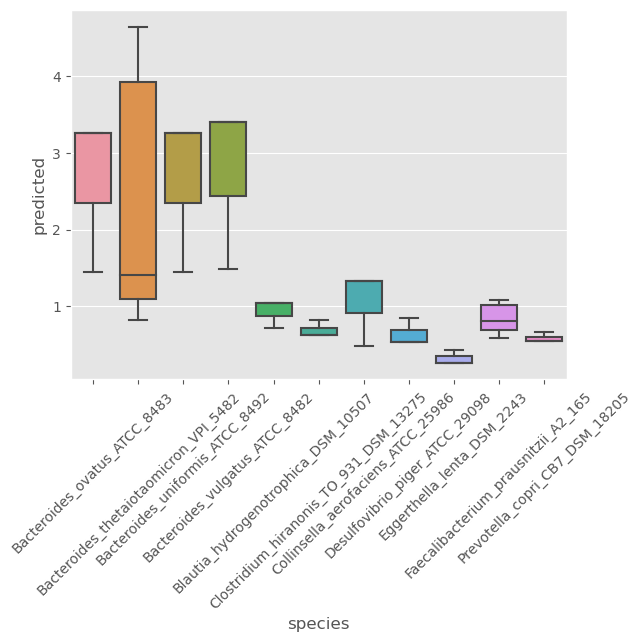

In [ ]:
ax= sns.boxplot(x="species", y="predicted", data=df) #seeing the values for species and corresponding predicted values
plt.xticks(rotation=45)
plt.show()

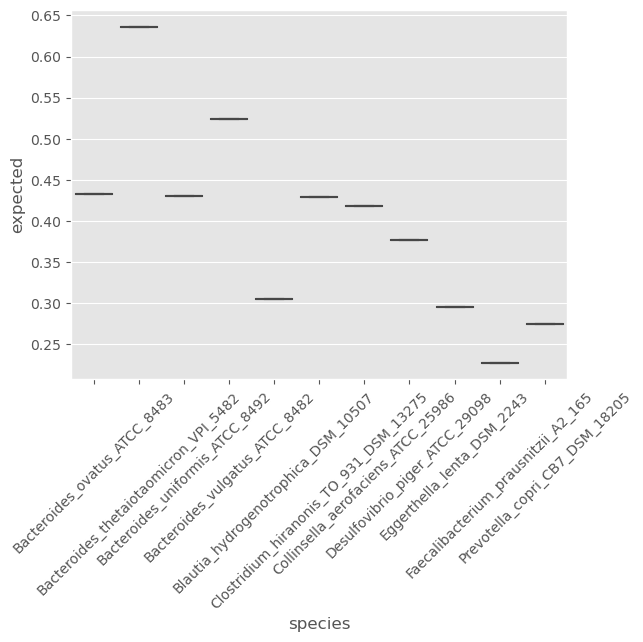

In [ ]:
ax= sns.boxplot(x="species", y="expected", data=df)#seeing the values for species and corresponding expected values (seems unimportant)
plt.xticks(rotation=45)
plt.show()

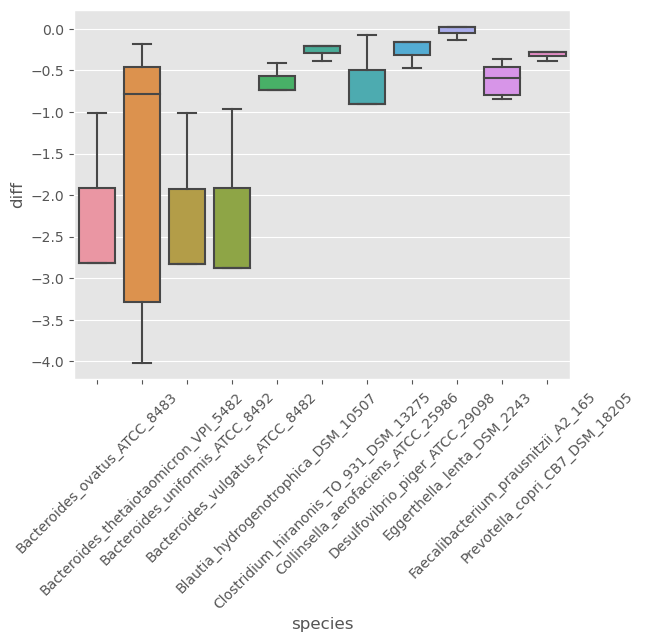

In [ ]:
ax= sns.boxplot(x="species", y="diff", data=df) #seeing the values for species and corresponding diff values
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split # dividing data into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=3)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31, 3)
(8, 3)
(31, 11)
(8, 11)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier #importing classifier to be used
rf_knn =  KNeighborsClassifier(3)#create an instance of the model
rf_knn.fit(X_train, y_train) #train the model on the scaled training set

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_k = rf_knn.predict(X_test) #make predictions for the scaled test set
print(y_pred_k.shape)
y_pred_k #these are the predictions made by the model

(8, 11)


array([[False, False, False, False, False, False, False, False, False,
        False,  True],
       [ True, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False,  True,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False,  True],
       [False, False, False, False,  True, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False,  True, False,
        False, False]])

In [ ]:
from sklearn.metrics import accuracy_score #accuracy
print(accuracy_score(y_test, y_pred_k))

0.125


In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier #importing classifier to be used
rf_clf = RandomForestClassifier(max_depth=15, n_estimators=500, max_features=3)#create an instance of the model
rf_clf.fit(X_train, y_train) #train the model on the scaled training set

RandomForestClassifier(max_depth=15, max_features=3, n_estimators=500)

In [ ]:
y_pred = rf_clf.predict(X_test) #make predictions for the scaled test set
print(y_pred.shape)
y_pred #these are the predictions made by the model

(8, 11)


array([[False, False, False, False, False, False, False, False, False,
         True, False],
       [False, False, False,  True, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False,  True,
        False, False],
       [False,  True, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
         True, False],
       [False, False, False, False, False, False, False, False, False,
         True, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False,  True]])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)) #checking the accuracy

0.875


In [ ]:
df_imp = pd.DataFrame(rf_clf.feature_importances_, index=X_train.columns, columns=["Feature Importance"]).sort_values("Feature Importance", ascending=False)
df_imp #importance of feat

,Feature Importance
expected,0.716859
diff,0.145214
predicted,0.137928


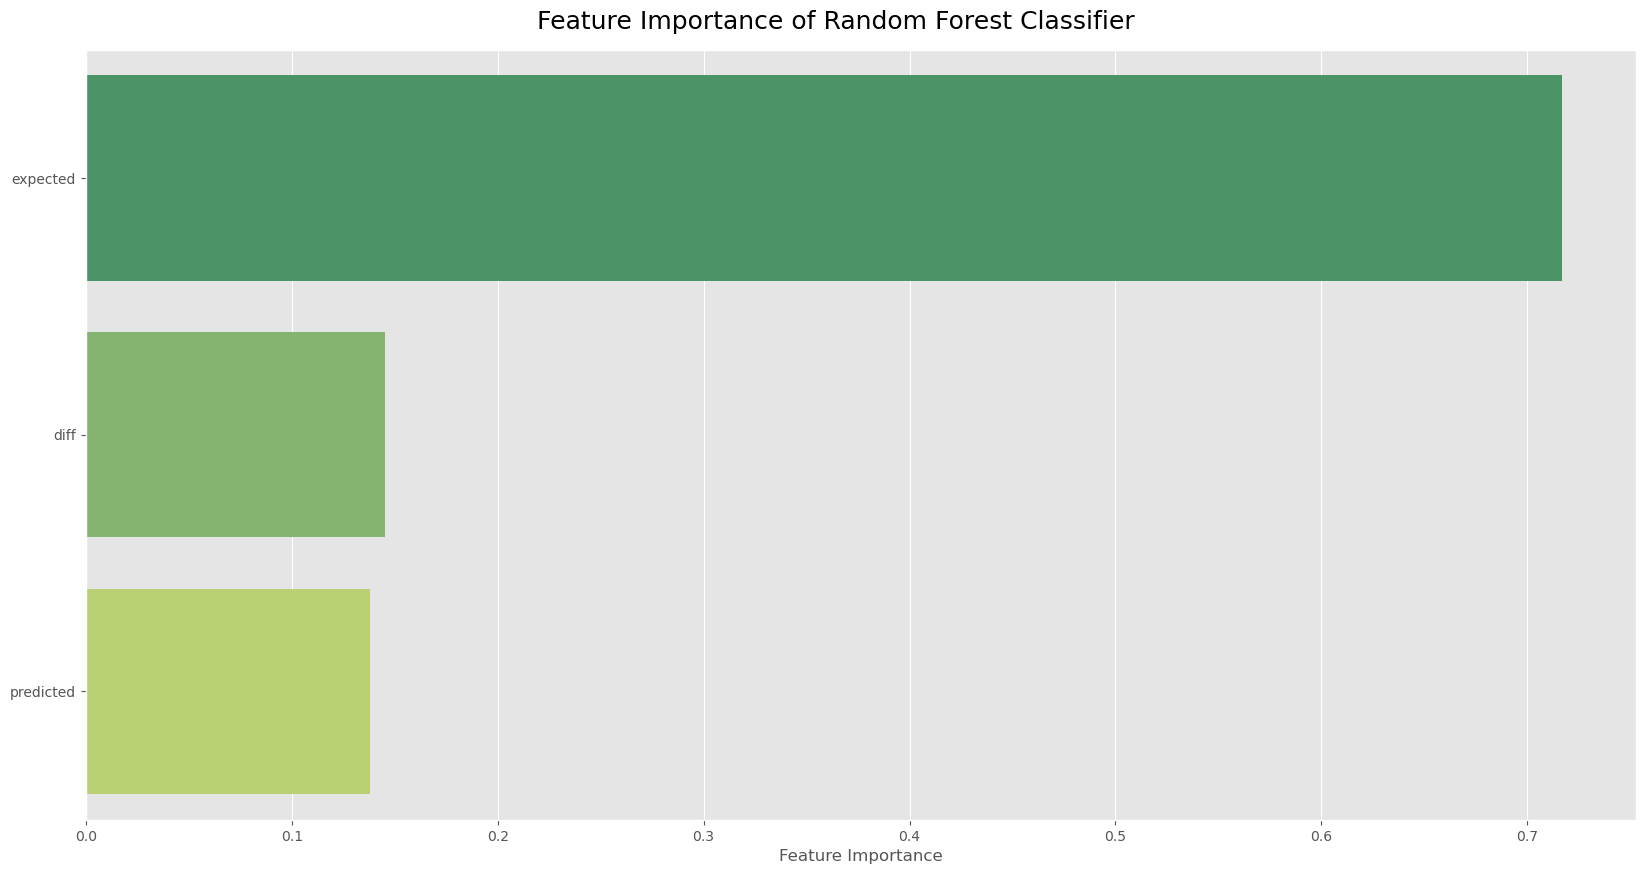

In [ ]:
fig = plt.figure(figsize=(20,10)) # feature importance of graphs
ax = sns.barplot(x="Feature Importance", y=df_imp.index, data=df_imp, palette="summer")
fig.suptitle("Feature Importance of Random Forest Classifier", y=0.92, fontsize=18);